In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point
import pyproj
from fiona.crs import from_epsg
import numpy as np
from geopandas import GeoDataFrame
import datetime
from datetime import timedelta, date

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

import statsmodels.api as sm

C:\Users\skyri\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [38]:
import tensorflow as tf

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [3]:
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["figure.figsize"] = (10,20)

In [4]:
bike_1 = pd.read_csv("./variable/bike_Gwang.csv", encoding="utf-8")
pop_1 = pd.read_csv("./variable/population_Gwang.csv", encoding="utf-8")
wea_1 = pd.read_csv("./variable/weather_Gwang.csv", encoding="utf-8")

In [5]:
bike_2 = pd.read_csv("./variable/bike_Dong.csv", encoding="utf-8")
pop_2 = pd.read_csv("./variable/population_Dong.csv", encoding="utf-8")
wea_2 = pd.read_csv("./variable/weather_Dong.csv", encoding="utf-8")

In [6]:
bike_3 = pd.read_csv("./variable/bike_Seong.csv", encoding="utf-8")
pop_3 = pd.read_csv("./variable/population_Seong.csv", encoding="utf-8")
wea_3 = pd.read_csv("./variable/weather_Seong.csv", encoding="utf-8")

In [7]:
bike_4 = pd.read_csv("./variable/bike_Jung.csv", encoding="utf-8")
pop_4 = pd.read_csv("./variable/population_Jung.csv", encoding="utf-8")
wea_4 = pd.read_csv("./variable/weather_Jung.csv", encoding="utf-8")

In [8]:
def concating(df1, df2, df3):
    data_1 = pd.merge(df1, df2, how="left", on="date")
    data_2 = pd.merge(data_1, df3, how="left", on="date")
    data_3 = data_2[['date', 'clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', '총생활인구수']]
    data_3["population"] = data_3["총생활인구수"]
    data_3.drop(["총생활인구수"], axis=1, inplace=True)
    return data_3

In [9]:
data_1 = concating(wea_1, bike_1, pop_1)
data_2 = concating(wea_2, bike_2, pop_2)
data_3 = concating(wea_3, bike_3, pop_3)
data_4 = concating(wea_4, bike_4, pop_4)

<ipython-input-8-b0b2ee2b43ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3["population"] = data_3["총생활인구수"]
C:\Users\skyri\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
data_1

,date,clear_day,day_view_time,lst,bike_place,bike,population
0,2018-01-01,3488.000365,118.000000,13794.534913,37,554,419550.0456
1,2018-01-02,2032.498815,109.000000,13742.956244,37,554,419550.0456
2,2018-01-03,3226.988696,116.000000,13683.819690,37,554,419550.0456
3,2018-01-04,1981.037362,106.000000,13438.312372,37,554,419550.0456
4,2018-01-05,3105.680583,113.094257,13751.535278,37,554,419550.0456
...,...,...,...,...,...,...,...
1631,2022-06-20,4607.313708,118.639562,15088.622154,86,1121,388187.6048
1632,2022-06-21,3557.058341,113.179581,15189.111030,86,1121,387553.7112
1633,2022-06-22,2014.866180,107.000000,15320.371012,86,1121,381017.9273
1634,2022-06-23,967.839235,103.845647,15283.629662,86,1121,378675.3951


In [11]:
data_1.columns

Index(['date', 'clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population'],
      dtype='object')

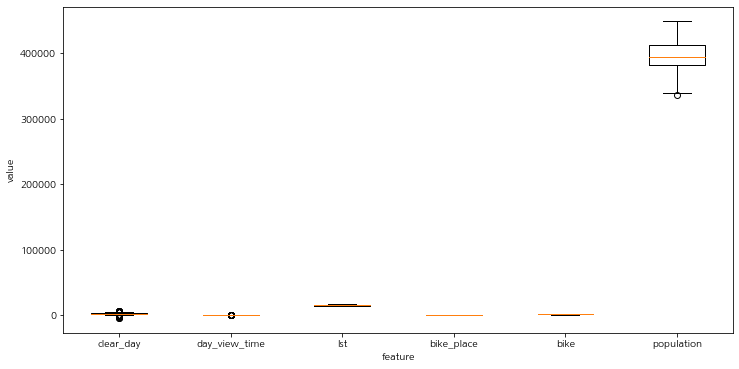

In [12]:
plt.figure(figsize=(12,6))
plt.boxplot(data_1[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population']])
plt.xlabel("feature")
plt.xticks([i for i in range(1,7)], labels=['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population'])
plt.ylabel("value")
plt.show()

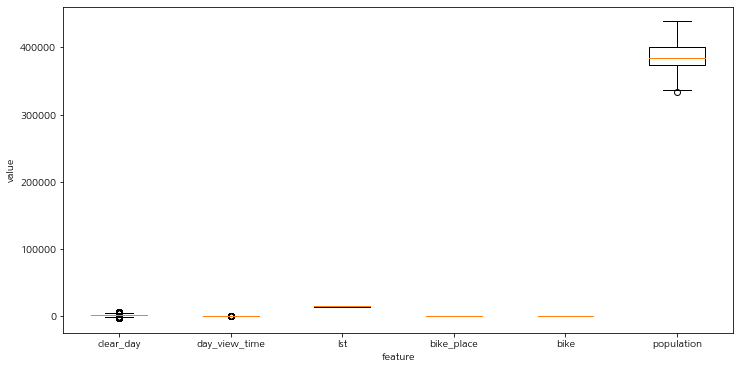

In [13]:
plt.figure(figsize=(12,6))
plt.boxplot(data_2[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population']])
plt.xlabel("feature")
plt.xticks([i for i in range(1,7)], labels=['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population'])
plt.ylabel("value")
plt.show()

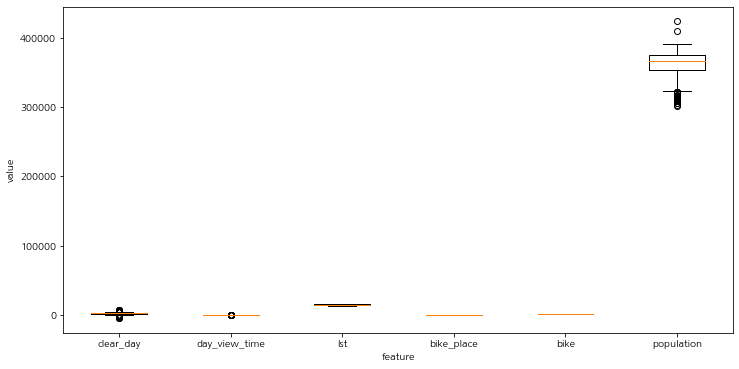

In [14]:
plt.figure(figsize=(12,6))
plt.boxplot(data_3[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population']])
plt.xlabel("feature")
plt.xticks([i for i in range(1,7)], labels=['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population'])
plt.ylabel("value")
plt.show()

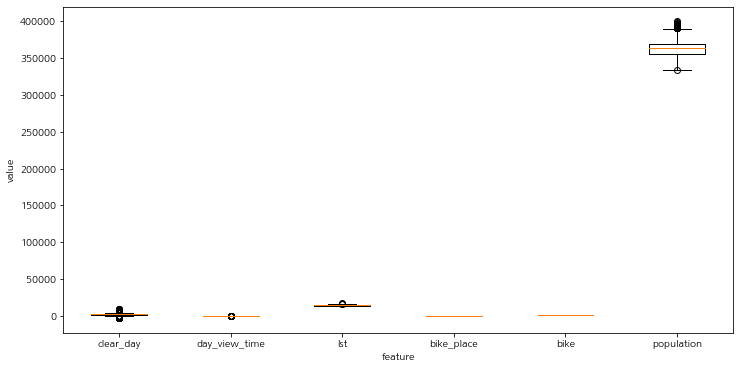

In [15]:
plt.figure(figsize=(12,6))
plt.boxplot(data_4[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population']])
plt.xlabel("feature")
plt.xticks([i for i in range(1,7)], labels=['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike',
       'population'])
plt.ylabel("value")
plt.show()

In [16]:
def spliting(data):
    data_train = data[:877]
    data_train.reset_index(drop=True, inplace=True)
    data_val = data[877:1169]
    data_val.reset_index(drop=True, inplace=True)
    data_test = data[1169:1461]
    data_test.reset_index(drop=True, inplace=True)
    return data_train, data_val, data_test

In [17]:
data_1_train, data_1_val, data_1_test = spliting(data_1)
data_2_train, data_2_val, data_2_test = spliting(data_2)
data_3_train, data_3_val, data_3_test = spliting(data_3)
data_4_train, data_4_val, data_4_test = spliting(data_4)

- 2021.12.31까지

In [18]:
print(len(data_1_train), len(data_1_val), len(data_1_test))

877 292 292


In [19]:
x_1_train = data_1_train[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_2_train = data_2_train[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_3_train = data_3_train[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_4_train = data_4_train[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]

In [20]:
x_1_val = data_1_val[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_2_val = data_2_val[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_3_val = data_3_val[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_4_val = data_4_val[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]

In [21]:
x_1_test = data_1_test[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_2_test = data_2_test[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_3_test = data_3_test[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]
x_4_test = data_4_test[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]

In [22]:
def normalize(x_train, data, data_title):
    train_mean = np.mean(x_train, axis=0)
    train_std = np.std(x_train, axis=0)
    data_scaled = (data - train_mean) / train_std
    plt.figure(figsize=(12,5))
    plt.boxplot(data_scaled)
    plt.title(data_title)
    plt.xlabel("feature")
    plt.ylabel("value")
    plt.show()
    return data_scaled

C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


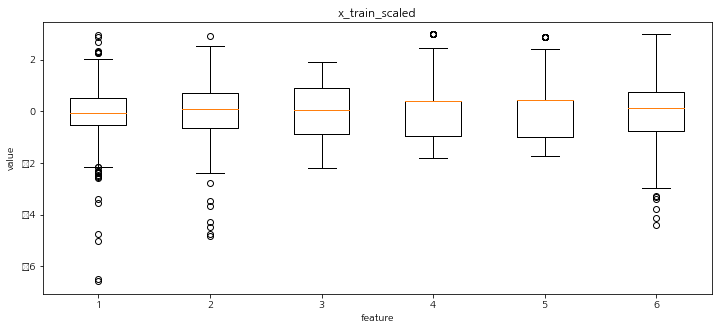

C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


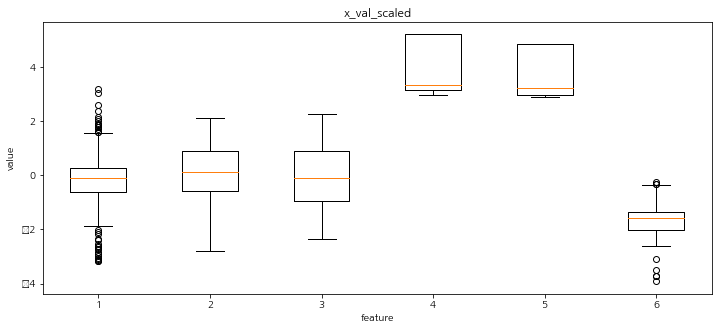

C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


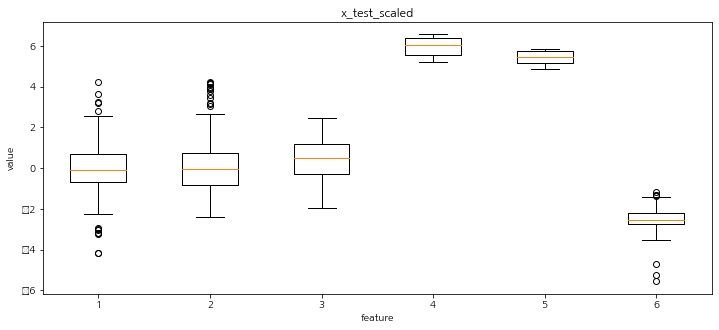

In [23]:
x_1_train_scaled = normalize(x_1_train, x_1_train, "x_train_scaled")
x_1_val_scaled = normalize(x_1_train, x_1_val, "x_val_scaled")
x_1_test_scaled = normalize(x_1_train, x_1_test, "x_test_scaled")

C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


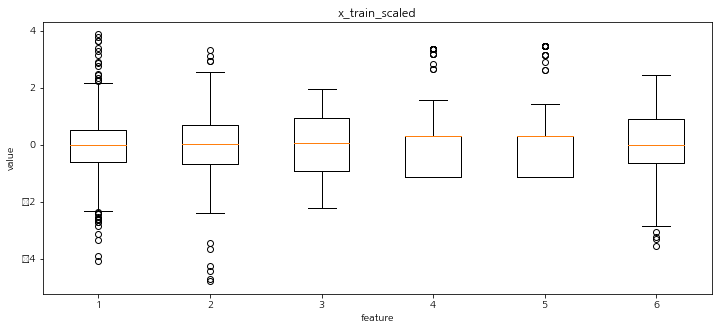

C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


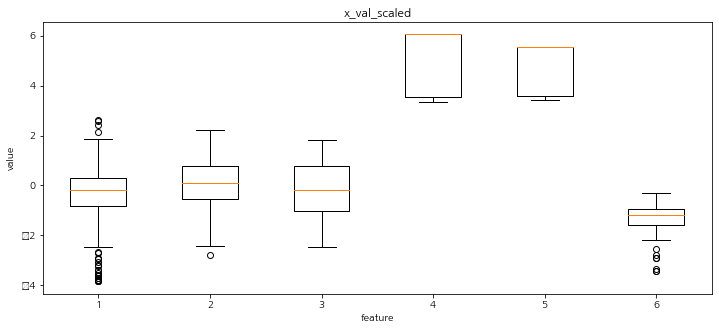

C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


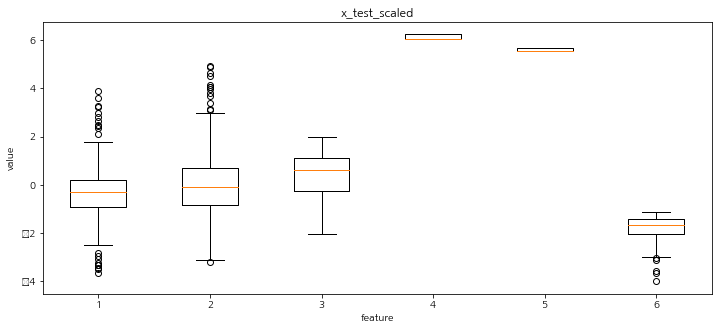

In [24]:
x_2_train_scaled = normalize(x_2_train, x_2_train, "x_train_scaled")
x_2_val_scaled = normalize(x_2_train, x_2_val, "x_val_scaled")
x_2_test_scaled = normalize(x_2_train, x_2_test, "x_test_scaled")

C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


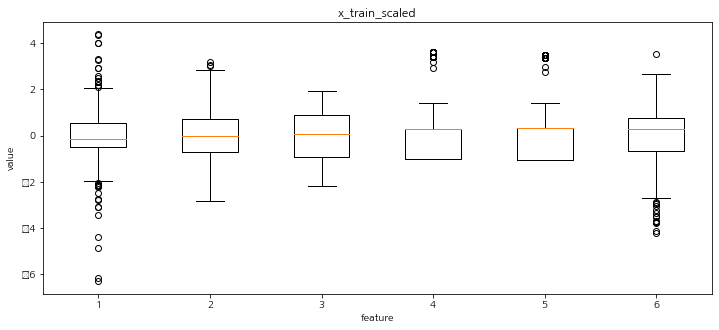

C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


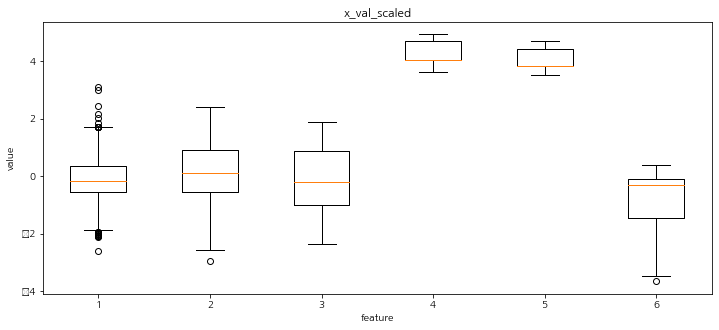

C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\skyri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


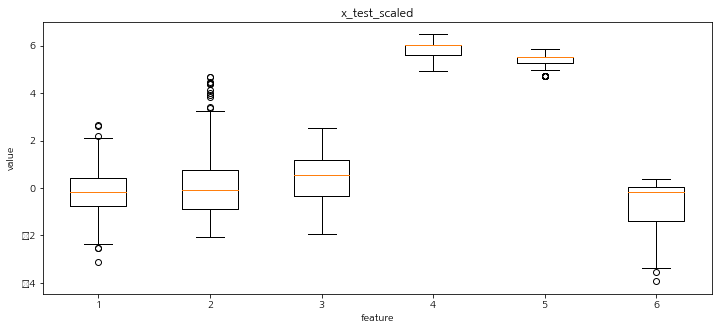

In [25]:
x_3_train_scaled = normalize(x_3_train, x_3_train, "x_train_scaled")
x_3_val_scaled = normalize(x_3_train, x_3_val, "x_val_scaled")
x_3_test_scaled = normalize(x_3_train, x_3_test, "x_test_scaled")

- y

In [26]:
data = pd.read_csv("./target/train.csv")
data.head()

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308


In [27]:
def converting_to_real_dt(col):
    new_col = []
    format_t = '%Y%m%d'
    for i in col:
        dt = datetime.datetime.strptime(str(i), format_t).date()
        new_col.append(dt)
    return new_col

data["date"] = converting_to_real_dt(data["일시"])
data.drop(["일시"], axis=1, inplace=True)

In [28]:
data["광진구"] = min_max_scaler.fit_transform(data["광진구"].to_numpy().reshape(-1,1))
data["동대문구"] = min_max_scaler.fit_transform(data["동대문구"].to_numpy().reshape(-1,1))
data["성동구"] = min_max_scaler.fit_transform(data["성동구"].to_numpy().reshape(-1,1))
data["중랑구"] = min_max_scaler.fit_transform(data["중랑구"].to_numpy().reshape(-1,1))

In [29]:
data_1 = data[["date", "광진구"]]
data_1["real"] = data_1["광진구"]
data_1.drop(["광진구"], axis=1, inplace=True)
data_2 = data[["date", "동대문구"]]
data_2["real"] = data_2["동대문구"]
data_2.drop(["동대문구"], axis=1, inplace=True)
data_3 = data[["date", "성동구"]]
data_3["real"] = data_3["성동구"]
data_3.drop(["성동구"], axis=1, inplace=True)
data_4 = data[["date", "중랑구"]]
data_4["real"] = data_4["중랑구"]
data_4.drop(["중랑구"], axis=1, inplace=True)

<ipython-input-29-78f9fba920fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1["real"] = data_1["광진구"]
C:\Users\skyri\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-29-78f9fba920fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [30]:
data_1_train, data_1_val, data_1_test = spliting(data_1)
data_2_train, data_2_val, data_2_test = spliting(data_2)
data_3_train, data_3_val, data_3_test = spliting(data_3)
data_4_train, data_4_val, data_4_test = spliting(data_4)

In [31]:
y_1_train = data_1_train[["real"]]
y_2_train = data_2_train[["real"]]
y_3_train = data_3_train[["real"]]
y_4_train = data_4_train[["real"]]

In [32]:
y_1_val = data_1_val[["real"]]
y_2_val = data_2_val[["real"]]
y_3_val = data_3_val[["real"]]
y_4_val = data_4_val[["real"]]

In [33]:
y_1_test = data_1_test[["real"]]
y_2_test = data_2_test[["real"]]
y_3_test = data_3_test[["real"]]
y_4_test = data_4_test[["real"]]

- 섞기

In [34]:
train_1 = pd.concat([data_1_train, x_1_train_scaled], axis=1)
train_1 = train_1.sample(frac=1, random_state=1212).reset_index(drop=True)
train_1

,date,real,clear_day,day_view_time,lst,bike_place,bike,population
0,2019-04-30,0.638567,0.590487,0.739256,-0.097905,0.416778,0.432349,-0.213926
1,2019-09-22,0.298340,-1.685117,1.400100,0.414161,0.416778,0.432349,0.605215
2,2020-05-13,0.606033,-0.084583,0.116838,0.798081,2.978791,2.890326,-1.023174
3,2018-04-10,0.172550,0.420114,-0.350105,0.577021,-1.120430,-1.130604,0.714272
4,2018-03-25,0.142123,0.054578,-0.497097,0.141505,-1.291231,-1.330983,0.768727
...,...,...,...,...,...,...,...,...
872,2019-04-10,0.216544,-0.930731,-1.136330,-0.754372,0.416778,0.432349,0.474878
873,2019-08-02,0.521470,-0.117621,-0.253664,1.334516,0.416778,0.432349,-1.875446
874,2019-03-15,0.182561,1.700487,-1.146188,-0.707398,0.416778,0.432349,0.696999
875,2019-10-29,0.506191,-0.996019,-0.350105,-0.197962,0.416778,0.432349,-0.620966


In [35]:
x = sm.add_constant(train_1[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]) # adding a constant
y = train_1[["real"]]
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   real   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.34e-158
Time:                        06:50:52   Log-Likelihood:                 489.02
No. Observations:                 877   AIC:                            -964.0
Df Residuals:                     870   BIC:                            -930.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3397      0.005     72.318

In [45]:
x = train_1[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']].to_numpy()
y = train_1[["real"]].to_numpy()

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [47]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [49]:
hist = model.fit(x, y, epochs = 500, verbose=0, batch_size=1)
model.summary()

KeyboardInterrupt: 

In [ ]:
y_1_pred = model.predict(x_1_test_scaled)
data_1_test["pred"] = y_1_pred
data_1_test.to_csv("./result/mlr_Gwang.csv", encoding="utf-8")
model.evaluate(x_1_test_scaled, y_1_test)

In [ ]:
train_2 = pd.concat([data_2_train, x_2_train_scaled], axis=1)
train_2 = train_2.sample(frac=1, random_state=1212).reset_index(drop=True)

x = sm.add_constant(train_2[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]) # adding a constant
y = train_2[["real"]]
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

In [ ]:
x = train_2[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']].to_numpy()
y = train_2[["real"]].to_numpy()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

hist = model.fit(x, y, epochs = 500, verbose=0, batch_size=1)
model.summary()

In [ ]:
y_2_pred = model.predict(x_2_test_scaled)
data_2_test["pred"] = y_2_pred
data_2_test.to_csv("./result/mlr_Dong.csv", encoding="utf-8")
model.evaluate(x_2_test_scaled, y_2_test)

In [ ]:
train_3 = pd.concat([data_3_train, x_3_train_scaled], axis=1)
train_3 = train_3.sample(frac=1, random_state=1212).reset_index(drop=True)

x = sm.add_constant(train_3[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]) # adding a constant
y = train_3[["real"]]
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

In [ ]:
x = train_3[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']].to_numpy()
y = train_3[["real"]].to_numpy()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

hist = model.fit(x, y, epochs = 500, verbose=0, batch_size=1)
model.summary()

In [ ]:
y_3_pred = model.predict(x_3_test_scaled)
data_3_test["pred"] = y_3_pred
data_3_test.to_csv("./result/mlr_Seong.csv", encoding="utf-8")
model.evaluate(x_3_test_scaled, y_3_test)

In [ ]:
train_4 = pd.concat([data_4_train, x_4_train_scaled], axis=1)
train_4 = train_4.sample(frac=1, random_state=1212).reset_index(drop=True)

x = sm.add_constant(train_4[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']]) # adding a constant
y = train_4[["real"]]
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

In [ ]:
x = train_4[['clear_day', 'day_view_time', 'lst', 'bike_place', 'bike', 'population']].to_numpy()
y = train_4[["real"]].to_numpy()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

hist = model.fit(x, y, epochs = 500, verbose=0, batch_size=1)
model.summary()

In [ ]:
y_4_pred = model.predict(x_4_test_scaled)
data_4_test["pred"] = y_4_pred
data_4_test.to_csv("./result/mlr_Jung.csv", encoding="utf-8")
model.evaluate(x_4_test_scaled, y_4_test)